In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier,BaggingClassifier
from sklearn.metrics import classification_report

Matplotlib is building the font cache; this may take a moment.


In [3]:
df = pd.read_csv('Churn.csv')
dt=pd.read_csv('Churn.csv')
np.set_printoptions(threshold=np.inf)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',len(df))
df.head()

Unnamed: 0 state      area.code  account.length voice.plan  voice.messages  \
0           1    KS  area_code_415             128        yes              25   
1           2    OH  area_code_415             107        yes              26   
2           3    NJ  area_code_415             137         no               0   
3           4    OH  area_code_408              84         no               0   
4           5    OK  area_code_415              75         no               0   

  intl.plan  intl.mins  intl.calls  intl.charge  day.mins  day.calls  \
0        no       10.0           3         2.70     265.1        110   
1        no       13.7           3         3.70     161.6        123   
2        no       12.2           5         3.29     243.4        114   
3       yes        6.6           7         1.78     299.4         71   
4       yes       10.1           3         2.73     166.7        113   

  day.charge eve.mins  eve.calls  eve.charge  night.mins  night.calls  \
0      45.07    197.4         99       16.78       244.7           91   
1      27.47    195.5        103       16.62       254.4          103   
2      41.38    121.2        110       10.30       162.6          104   
3       50.9     61.9         88        5.26       196.9           89   
4      28.34    148.3        122       12.61       186.9          121   

   night.charge  customer.calls churn  
0         11.01               1    no  
1         11.45               1    no  
2          7.32               0    no  
3          8.86               2    no  
4          8.41               3    no

checking Duplicates

In [4]:
df.shape

(5000, 21)

In [5]:
df.drop_duplicates()
df.head()

Unnamed: 0 state      area.code  account.length voice.plan  voice.messages  \
0           1    KS  area_code_415             128        yes              25   
1           2    OH  area_code_415             107        yes              26   
2           3    NJ  area_code_415             137         no               0   
3           4    OH  area_code_408              84         no               0   
4           5    OK  area_code_415              75         no               0   

  intl.plan  intl.mins  intl.calls  intl.charge  day.mins  day.calls  \
0        no       10.0           3         2.70     265.1        110   
1        no       13.7           3         3.70     161.6        123   
2        no       12.2           5         3.29     243.4        114   
3       yes        6.6           7         1.78     299.4         71   
4       yes       10.1           3         2.73     166.7        113   

  day.charge eve.mins  eve.calls  eve.charge  night.mins  night.calls  \
0      45.07    197.4         99       16.78       244.7           91   
1      27.47    195.5        103       16.62       254.4          103   
2      41.38    121.2        110       10.30       162.6          104   
3       50.9     61.9         88        5.26       196.9           89   
4      28.34    148.3        122       12.61       186.9          121   

   night.charge  customer.calls churn  
0         11.01               1    no  
1         11.45               1    no  
2          7.32               0    no  
3          8.86               2    no  
4          8.41               3    no

In [6]:
df[df.duplicated()]

Empty DataFrame
Columns: [Unnamed: 0, state, area.code, account.length, voice.plan, voice.messages, intl.plan, intl.mins, intl.calls, intl.charge, day.mins, day.calls, day.charge, eve.mins, eve.calls, eve.charge, night.mins, night.calls, night.charge, customer.calls, churn]
Index: []

Data Cleaning 

In [7]:
df['state'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   object 
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   object 
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      5000 non-null   object 
 13  eve.mins        5000 non-null   object 
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

In [9]:
df['day.charge'].unique()

array(['45.07', '27.47', '41.38', '50.9', '28.34', '37.98', '37.09',
       '26.69', '31.37', '43.96', '21.95', '31.91', 'Nan', '26.62',
       '20.52', '56.59', '33.39', '32.42', '32.25', '38.15', '26.37',
       '10.61', '31.11', '18.77', '13.79', '21.13', '36.21', '32.3',
       '20.28', '14.42', '38.44', '36.04', '42.43', '30.06', '37.4',
       '24.87', '22.24', '34.66', '23.87', '21.47', '29.43', '21.22',
       '14.59', '26.18', '20.55', '35.92', '27.05', '22.64', '32.62',
       '37.5', '31.64', '27.23', '25.67', '29.84', '21.57', '33.73',
       '25.3', '38.98', '32.66', '45.66', '32.93', '30.72', '22.3',
       '25.18', '42.76', '21.28', '35.97', '30.41', '41.11', '38.23',
       '42.26', '34.58', '40.09', '26.71', '51.05', '10.47', '36.4',
       '28.93', '34.19', '36.62', '28.15', '42.42', '35.8', '30.48',
       '26.84', '36.43', '26.2', '40.44', '24.46', '42.99', '30.45',
       '47.33', '27.22', '33.69', '36.06', '42.81', '27.4', '30.31',
       '25.79', '22.95', '28.99'

In [10]:
df[df['day.charge'] == 'Nan']

Unnamed: 0 state      area.code  account.length voice.plan  \
12            13    IA  area_code_408             168         no   
27            28    MT  area_code_408              54         no   
47            48    DE  area_code_408             142         no   
4407        4408    TN  area_code_415             125         no   
4755        4756    OK  area_code_408              17         no   
4965        4966    NC  area_code_408              92         no   
4992        4993    MT  area_code_415              83         no   

      voice.messages intl.plan  intl.mins  intl.calls  intl.charge  day.mins  \
12                 0        no       11.2           2         3.02     128.8   
27                 0        no       14.7           4         3.97     134.3   
47                 0        no        7.4           5         2.00     187.0   
4407               0        no        7.7           3         2.08     138.5   
4755               0        no       14.8           5         4.00     180.4   
4965               0        no       10.7           2         2.89     192.1   
4992               0        no       10.3           6         2.78     188.3   

      day.calls day.charge eve.mins  eve.calls  eve.charge  night.mins  \
12           96        Nan    104.9         71        8.92       141.1   
27           73        Nan    155.5        100       13.22       102.1   
47          133        Nan    134.6         74       11.44       242.2   
4407         96        Nan    159.7        117       13.57       212.7   
4755        121        Nan    228.5        111       19.42       199.5   
4965         87        Nan      193        122       16.41       133.4   
4992         70        Nan    243.8         88       20.72       213.7   

      night.calls  night.charge  customer.calls churn  
12            128          6.35               1    no  
27             68          4.59               3    no  
47            127         10.90               2    no  
4407           91          9.57               2    no  
4755           99          8.98               0    no  
4965           79          6.00               1    no  
4992           79          9.62               0    no

In [11]:
df['eve.mins'].unique()

array(['197.4', '195.5', '121.2', '61.9', '148.3', '220.6', '348.5',
       '103.1', '351.6', '222', '228.5', '163.4', '104.9', '247.6',
       '307.2', '317.8', '280.9', '218.2', '212.8', '159.5', '239.7',
       '169.9', '72.9', '137.3', '245.2', '277.1', '191.1', '155.5',
       '258.2', '215.1', '136.7', '201.5', '31.2', '252.4', '195',
       '217.3', '162.5', '223.7', '187.6', '271.8', '166.8', '203.9',
       '282.2', '165.3', '225.8', '213', '162.6', '134.6', '231.3',
       '217.2', '269.8', '211.1', '190.2', '267.5', '219.7', '249.3',
       '180', '75.3', '246.5', '177.4', '178.2', '246.1', '187.8',
       '162.9', '169.5', '206.4', '216.9', '169.1', '170.5', '188.2',
       '148.9', '226.7', '157.2', '223.3', '181', '77.1', '164.4',
       '155.2', '303.5', '204.8', '136.1', '259.7', '249.2', '225.9',
       '155', '208.5', '123.4', 'Nan', '194.9', '190.9', '173', '178.4',
       '190.6', '81', '213.3', '207.3', '209.4', '205.7', '252.2', '189',
       '183.6', '173.7', '18

In [12]:
df[df['eve.mins'] == 'Nan']

Unnamed: 0 state      area.code  account.length voice.plan  \
89            90    NJ  area_code_415             128         no   
102          103    VT  area_code_415             135         no   
110          111    MI  area_code_408             120         no   
159          160    FL  area_code_510             115        yes   
231          232    OH  area_code_415              63        yes   
254          255    TX  area_code_415              97         no   
299          300    MN  area_code_415              94         no   
345          346    VA  area_code_415             141         no   
460          461    UT  area_code_415              90         no   
557          558    TX  area_code_408              58        yes   
624          625    DC  area_code_415             126         no   
684          685    AK  area_code_408             110         no   
729          730    ME  area_code_415             151        yes   
750          751    AL  area_code_415             146        yes   
795          796    DE  area_code_415              92         no   
892          893    LA  area_code_415             109        yes   
1012        1013    ND  area_code_415             182         no   
1099        1100    HI  area_code_415             157         no   
1219        1220    KS  area_code_510              36         no   
1417        1418    AK  area_code_408             141         no   
1483        1484    NV  area_code_510             107         no   
1625        1626    WI  area_code_510             100        yes   
1699        1700    TX  area_code_408             133         no   
1778        1779    CO  area_code_510              54        yes   

      voice.messages intl.plan  intl.mins  intl.calls  intl.charge  day.mins  \
89                 0        no       13.9           4         3.75     237.9   
102                0        no       10.5           6         2.84     151.7   
110                0        no        8.3           8         2.24     165.0   
159               24        no        9.6           4         2.59     142.1   
231               36       yes       11.0           6         2.97     199.0   
254                0       yes       10.9           3         2.94     143.7   
299                0        no        6.6           5         1.78     181.5   
345                0        no        7.2           8         1.94     260.2   
460                0        no        9.6           5         2.59     261.8   
557               20        no        9.5           2         2.57     194.5   
624                0        no        5.1           2         1.38     161.4   
684                0        no       11.1           8         3.00     100.1   
729               26        no       13.4           5         3.62     196.5   
750               32        no        8.2           4         2.21     154.0   
795                0        no       10.8           4         2.92     197.0   
892               27        no       12.3           4         3.32     166.9   
1012               0        no        8.0           5         2.16     104.9   
1099               0        no        2.2           4         0.59     276.2   
1219               0        no       10.9           5         2.94     178.6   
1417               0        no       10.7           7         2.89      83.2   
1483               0       yes       10.0           3         2.70     234.1   
1625              38        no        9.8           6         2.65     224.7   
1699               0        no        8.4           3         2.27     221.1   
1778              39        no       11.3          10         3.05     117.6   

      day.calls day.charge eve.mins  eve.calls  eve.charge  night.mins  \
89          125      40.44      Nan         93       21.05       208.9   
102          82      25.79      Nan        105       10.12       180.0   
110         100      28.05      Nan         83       26.96       119.2   
159     

In [13]:
df['day.charge'].str.isdigit().count()

5000

In [14]:
df['eve.mins'].str.isdigit().count()

5000

In [15]:
df['day.charge'] = df['day.charge'].replace('Nan',np.nan)

In [16]:
df['eve.mins'] = df['eve.mins'].replace('Nan',np.nan)

In [17]:
df.drop(['Unnamed: 0','state'],axis = 1 ,inplace = True)

In [18]:
df.isna().sum()

area.code          0
account.length     0
voice.plan         0
voice.messages     0
intl.plan          0
intl.mins          0
intl.calls         0
intl.charge        0
day.mins           0
day.calls          0
day.charge         7
eve.mins          24
eve.calls          0
eve.charge         0
night.mins         0
night.calls        0
night.charge       0
customer.calls     0
churn              0
dtype: int64

In [22]:
print(df['eve.mins'].dtype)

object


In [23]:
df['eve.mins'] = pd.to_numeric(df['eve.mins'], errors='coerce')

In [24]:
df['eve.mins'].median()

201.0

In [25]:
df['eve.mins'] = df['eve.mins'].fillna(value=df['eve.mins'].median())

In [27]:
df['day.charge'] = pd.to_numeric(df['day.charge'], errors='coerce')

In [28]:
df['day.charge'].median()

30.62

In [29]:
df['day.charge'] = df['day.charge'].fillna(value=df['day.charge'].median())

In [30]:
df.isna().sum()

area.code         0
account.length    0
voice.plan        0
voice.messages    0
intl.plan         0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
churn             0
dtype: int64

In [31]:
df['day.charge'] = df['day.charge'].astype(float)
df['eve.mins'] = df['eve.mins'].astype(float)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area.code       5000 non-null   object 
 1   account.length  5000 non-null   int64  
 2   voice.plan      5000 non-null   object 
 3   voice.messages  5000 non-null   int64  
 4   intl.plan       5000 non-null   object 
 5   intl.mins       5000 non-null   float64
 6   intl.calls      5000 non-null   int64  
 7   intl.charge     5000 non-null   float64
 8   day.mins        5000 non-null   float64
 9   day.calls       5000 non-null   int64  
 10  day.charge      5000 non-null   float64
 11  eve.mins        5000 non-null   float64
 12  eve.calls       5000 non-null   int64  
 13  eve.charge      5000 non-null   float64
 14  night.mins      5000 non-null   float64
 15  night.calls     5000 non-null   int64  
 16  night.charge    5000 non-null   float64
 17  customer.calls  5000 non-null   i

EDA

In [33]:
obj = []
for i in df.columns:
    if df[i].dtype == 'object':
        obj.append(i)
print(obj)

['area.code', 'voice.plan', 'intl.plan', 'churn']


In [34]:
num = []
for i in df.columns:
    if df[i].dtype != 'object':
        num.append(i)
print(num)

['account.length', 'voice.messages', 'intl.mins', 'intl.calls', 'intl.charge', 'day.mins', 'day.calls', 'day.charge', 'eve.mins', 'eve.calls', 'eve.charge', 'night.mins', 'night.calls', 'night.charge', 'customer.calls']


In [35]:
df.nunique()

area.code            3
account.length     218
voice.plan           2
voice.messages      48
intl.plan            2
intl.mins          170
intl.calls          21
intl.charge        170
day.mins          1961
day.calls          123
day.charge        1961
eve.mins          1876
eve.calls          126
eve.charge        1659
night.mins        1853
night.calls        131
night.charge      1028
customer.calls      10
churn                2
dtype: int64

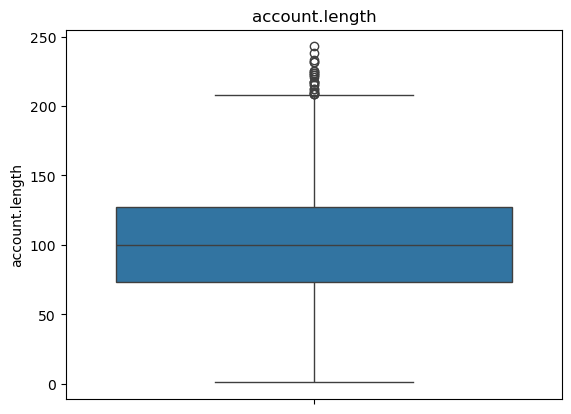

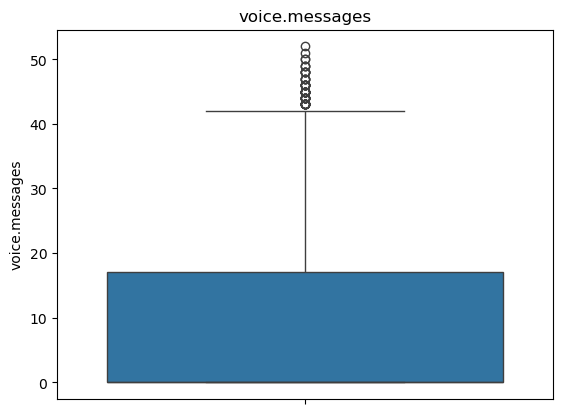

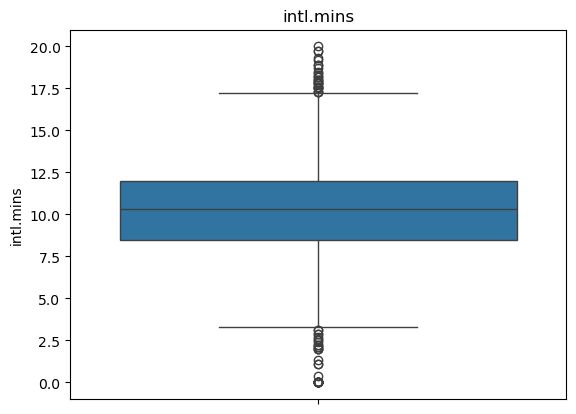

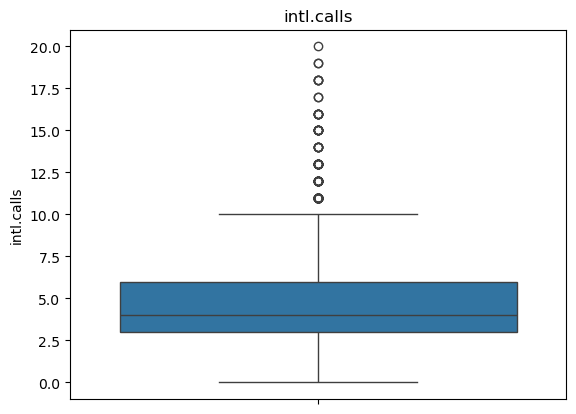

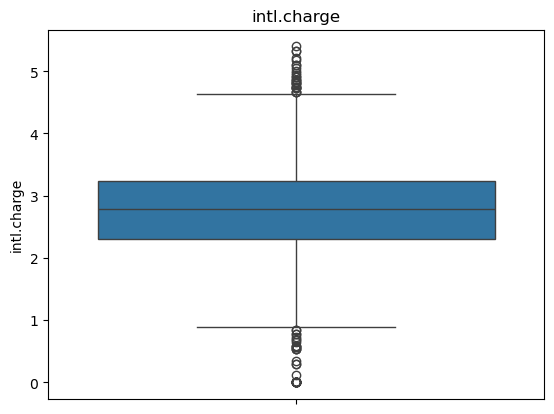

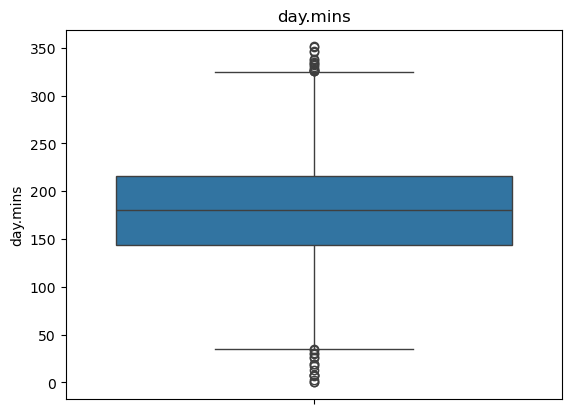

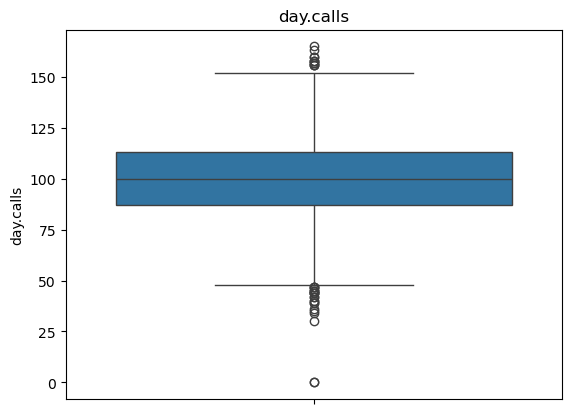

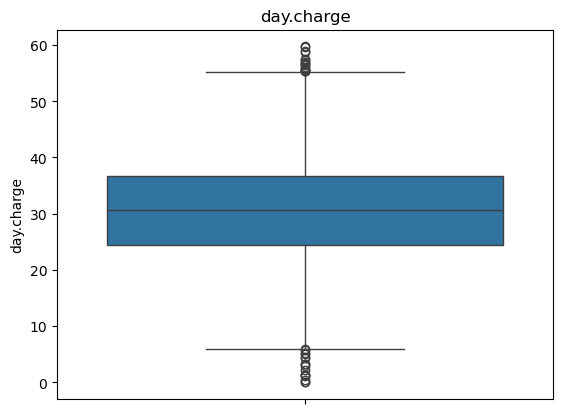

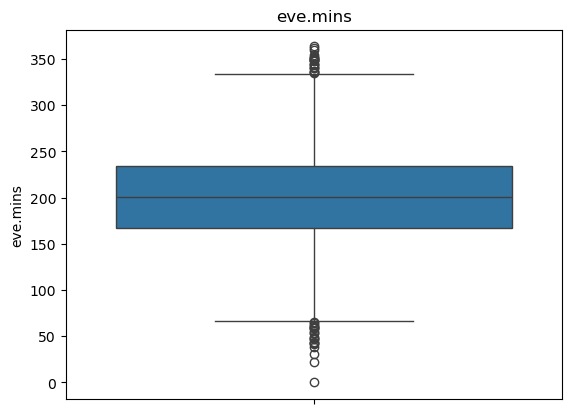

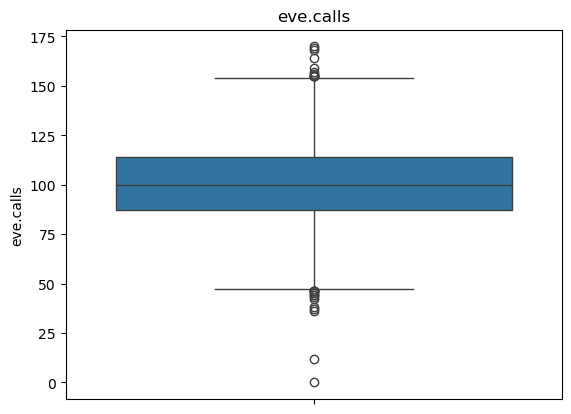

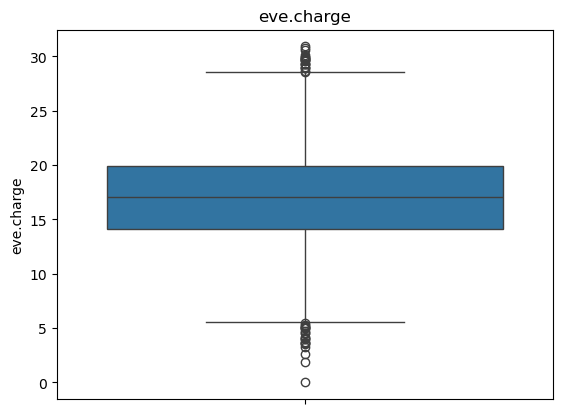

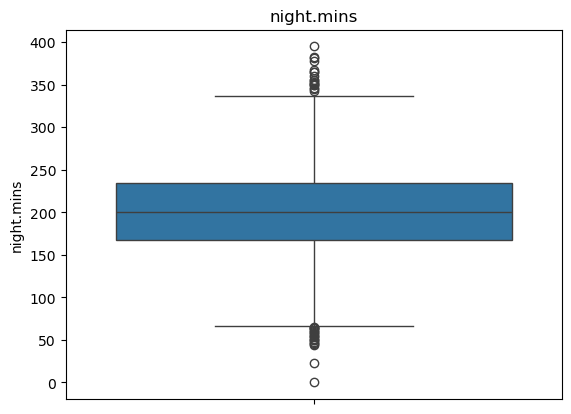

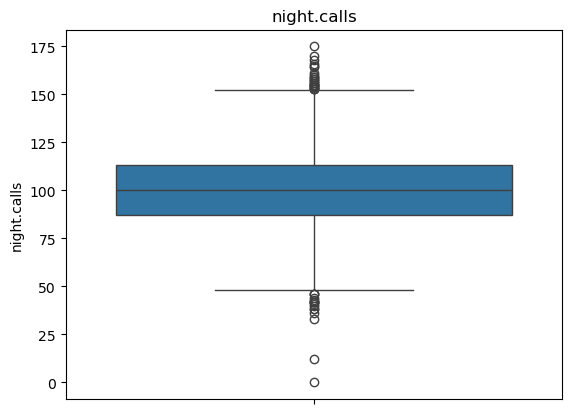

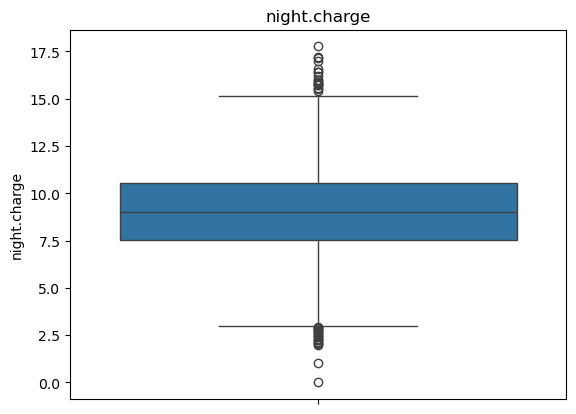

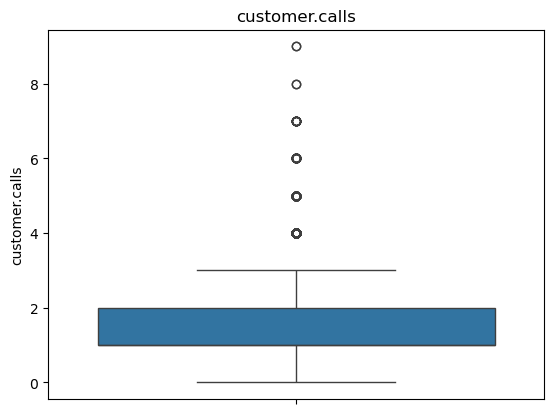

In [36]:
for i in num:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

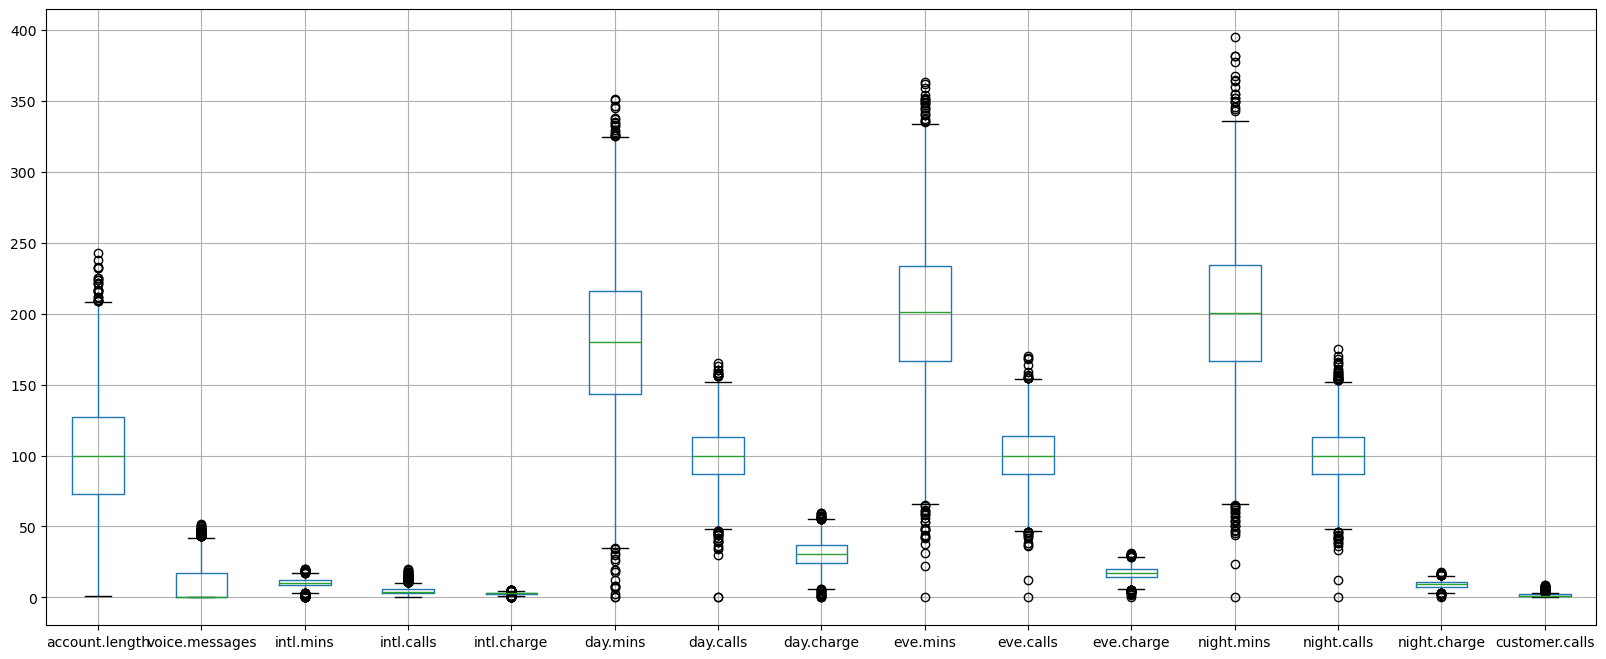

In [37]:
plt.figure(figsize = (20,8))
df.boxplot()
plt.show()

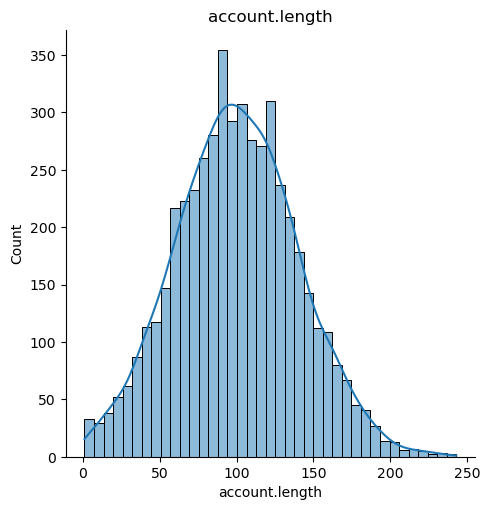

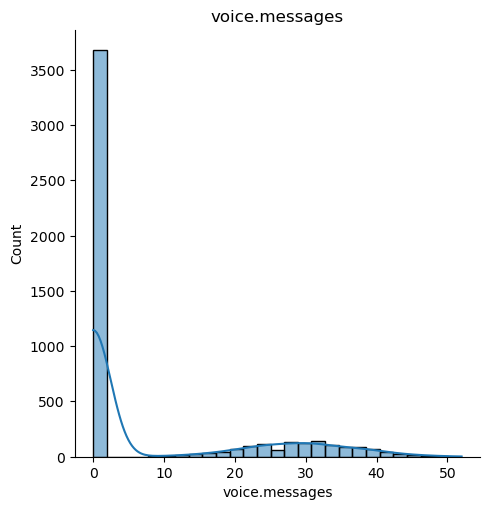

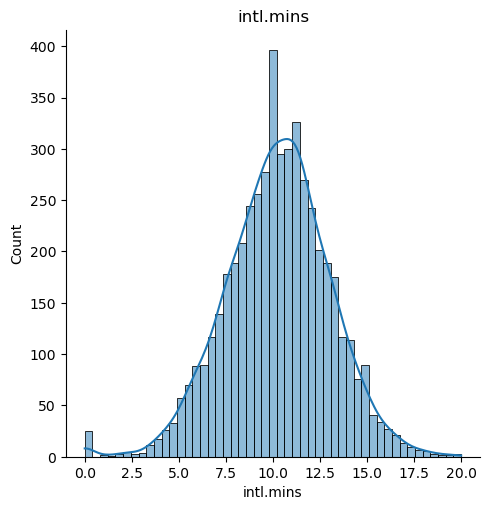

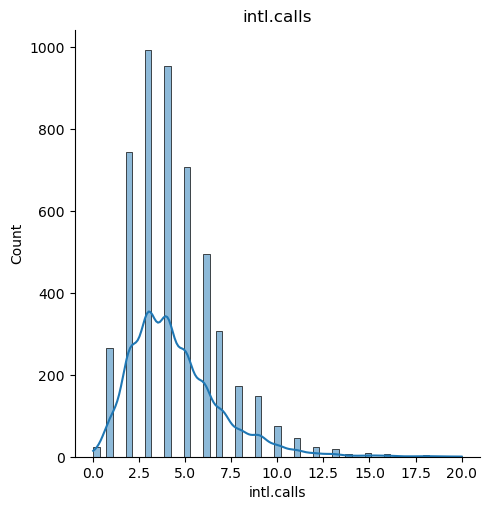

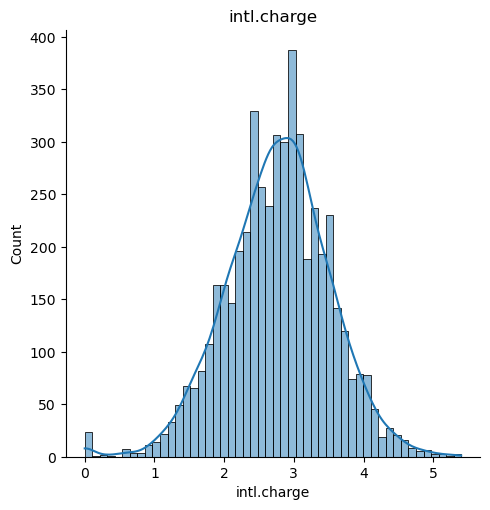

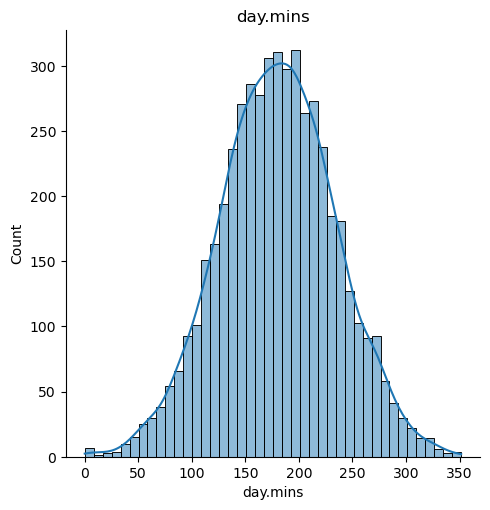

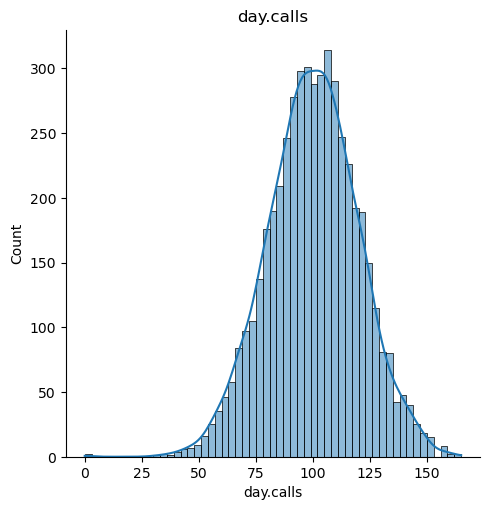

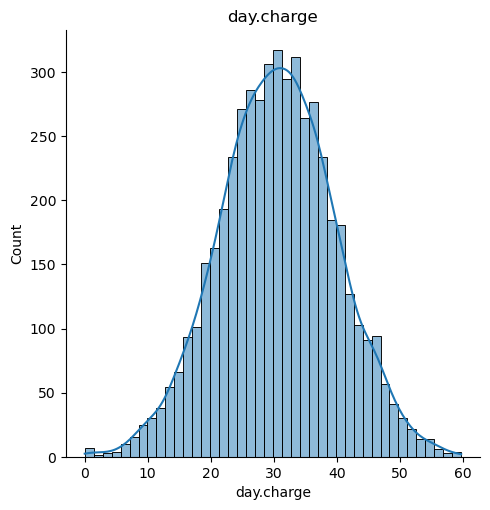

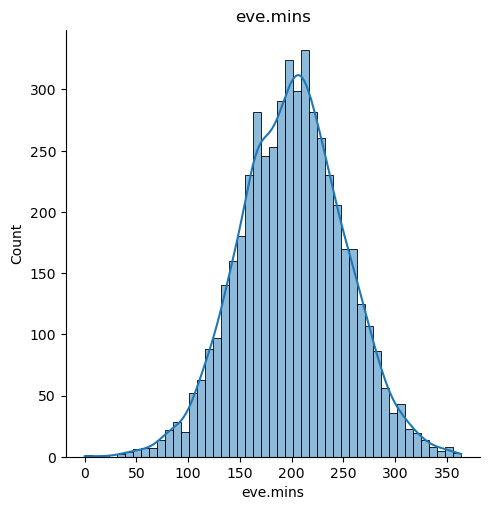

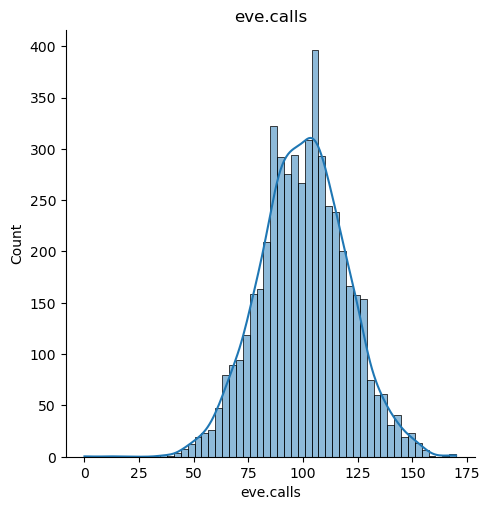

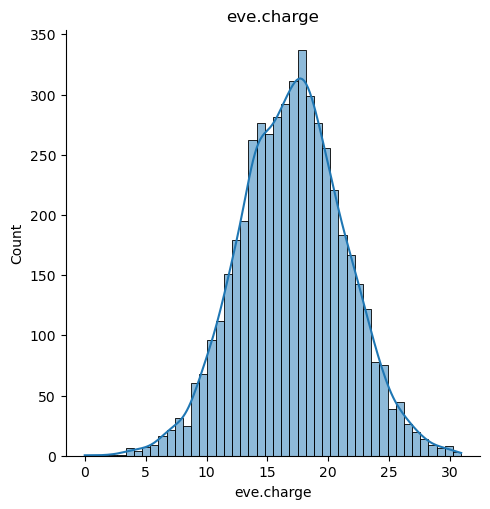

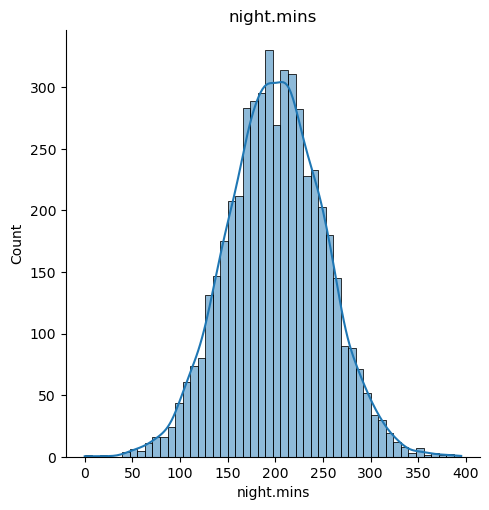

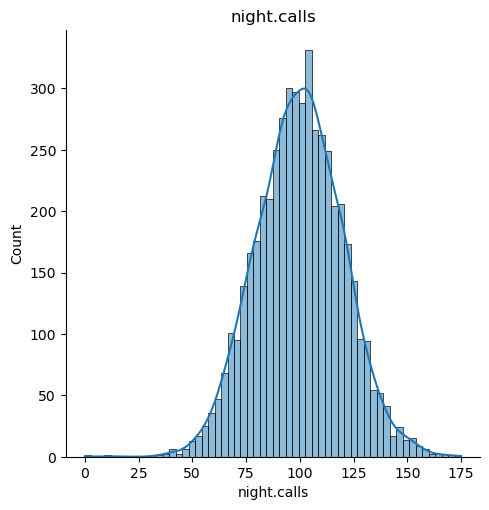

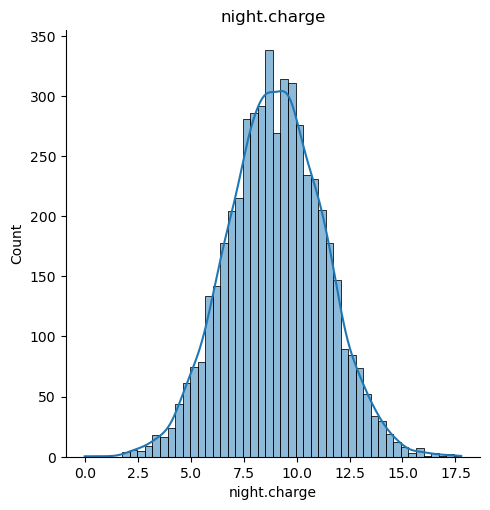

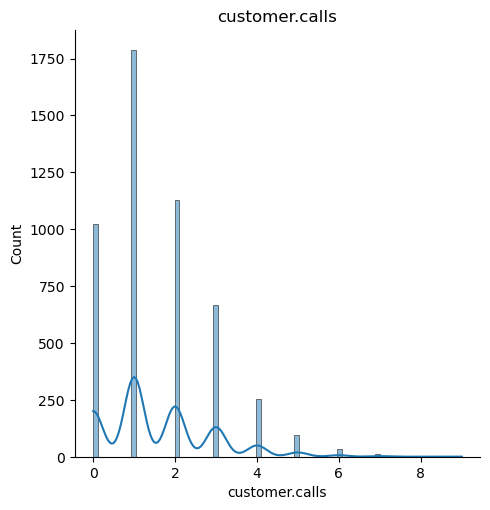

In [38]:
for i in num:
    sns.displot(df[i],kde=True)
    plt.title(i)
    plt.show()

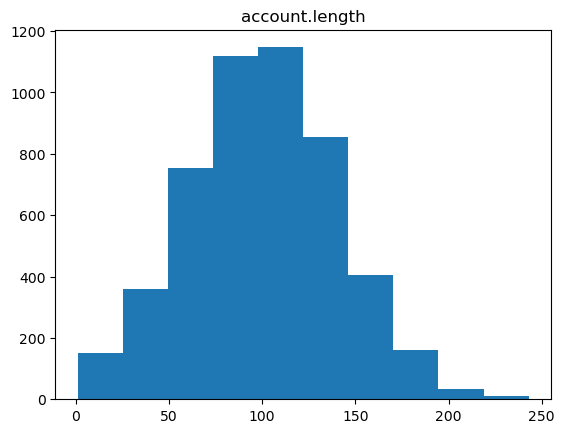

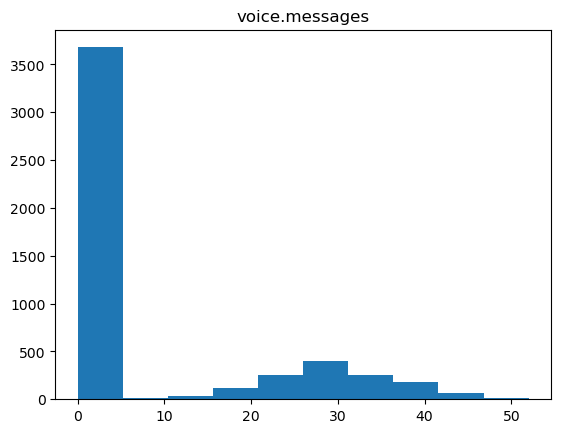

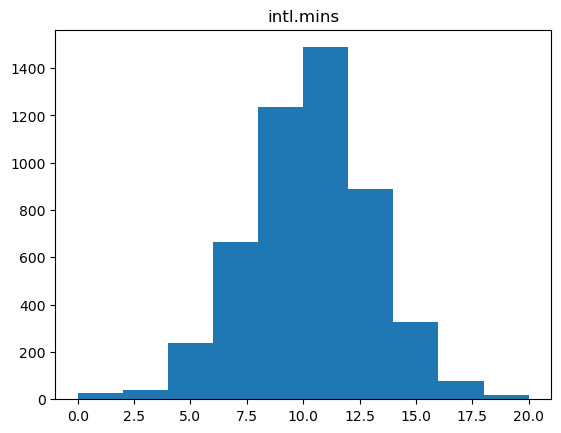

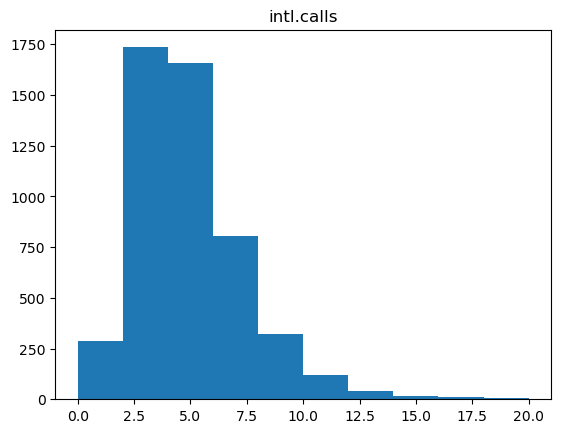

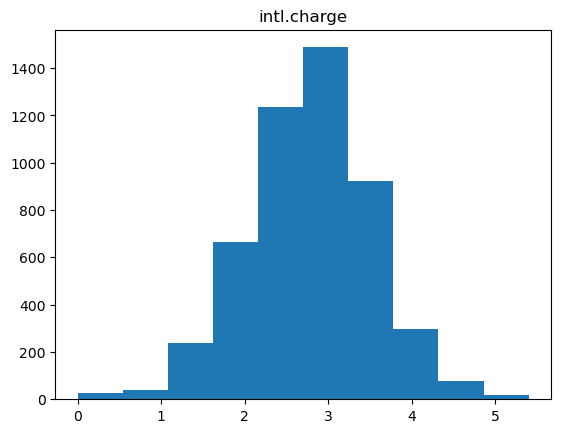

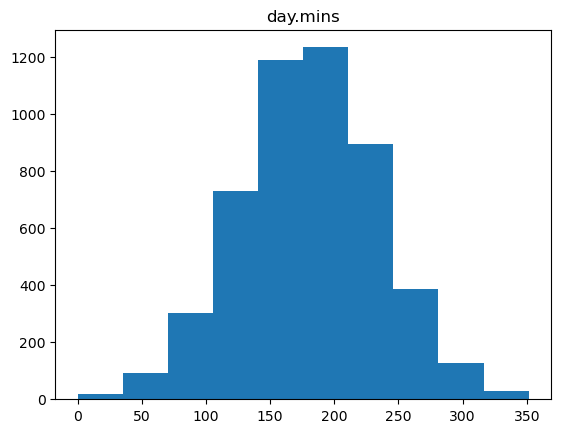

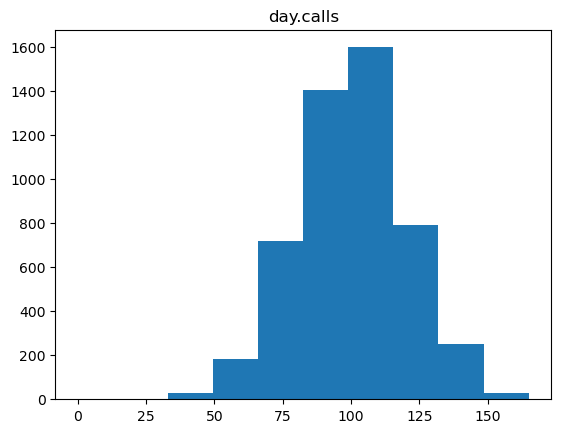

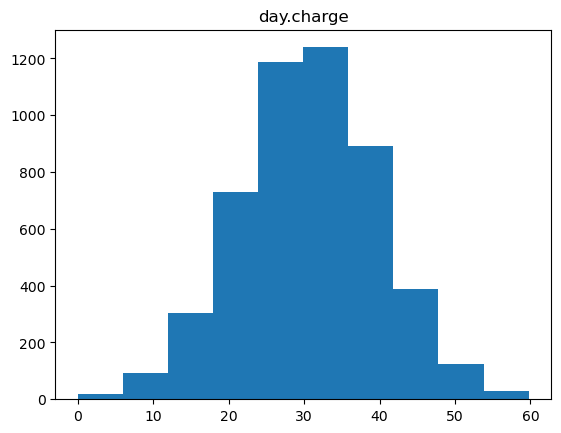

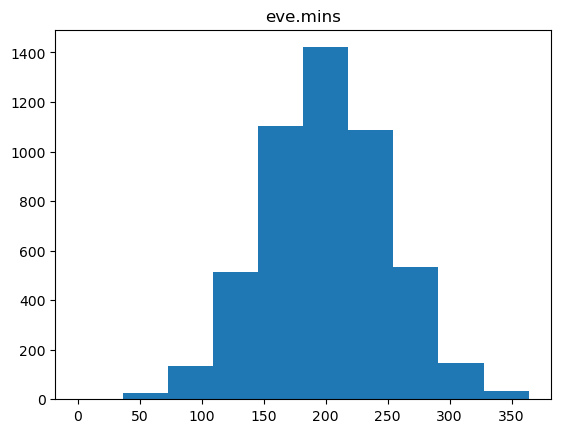

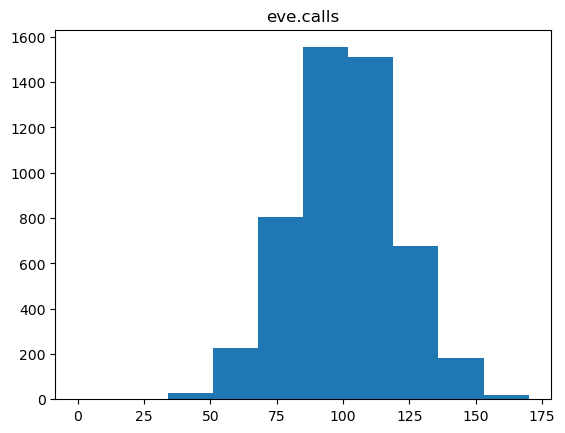

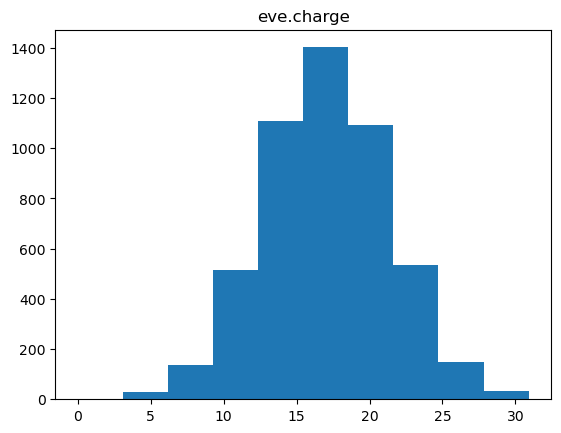

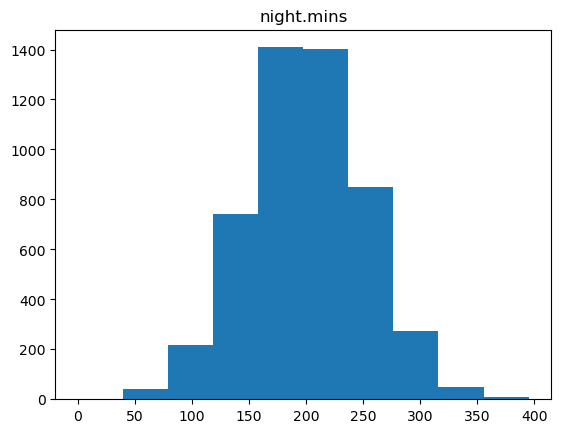

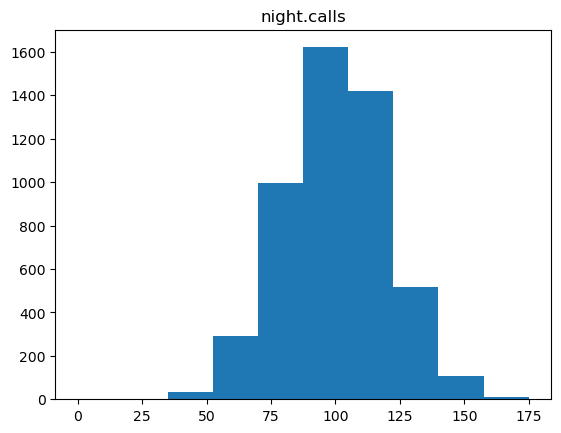

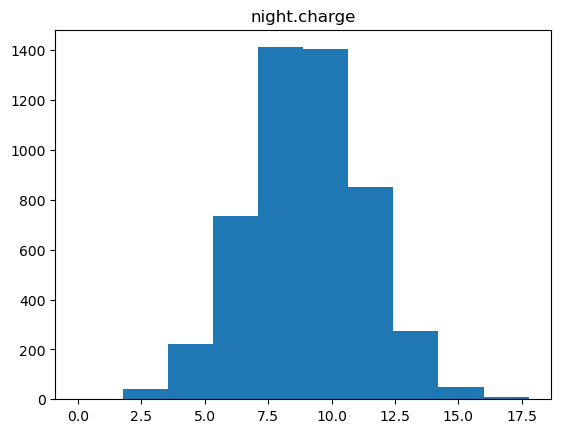

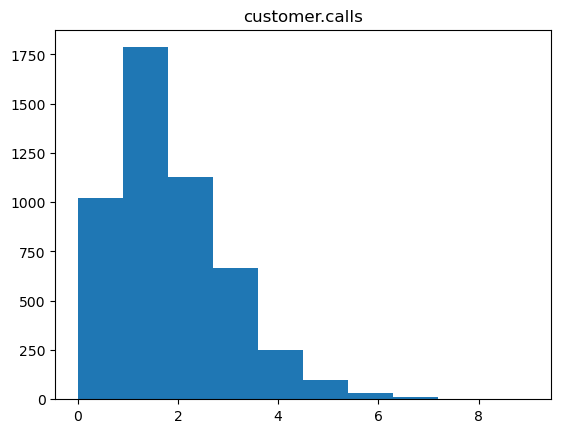

In [39]:
for i in num:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

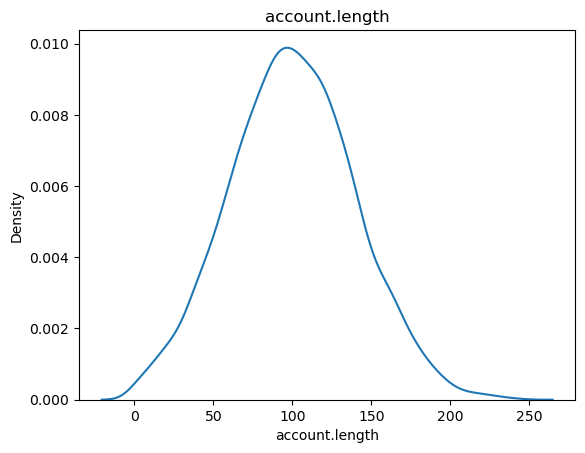

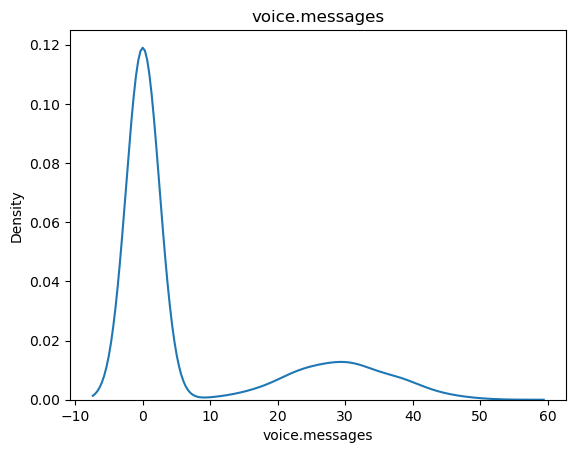

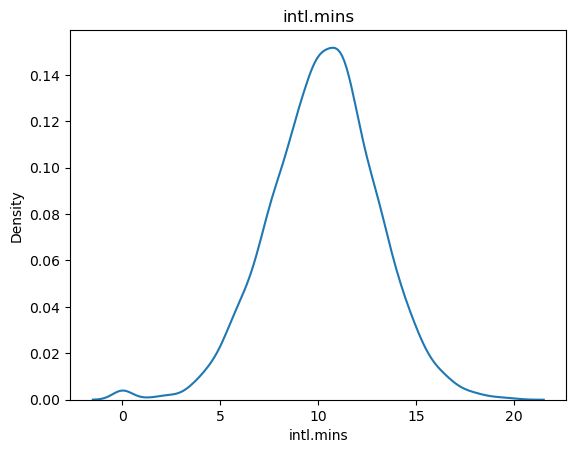

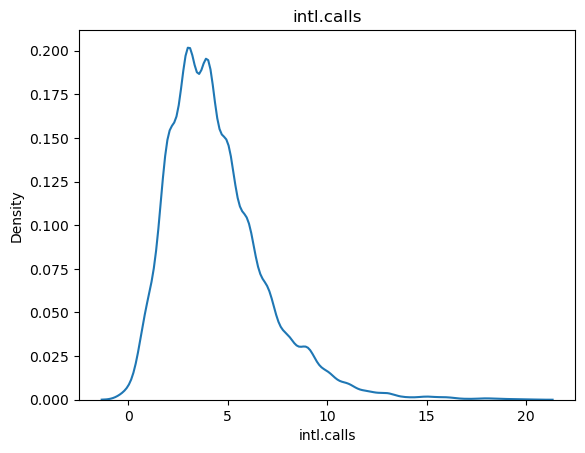

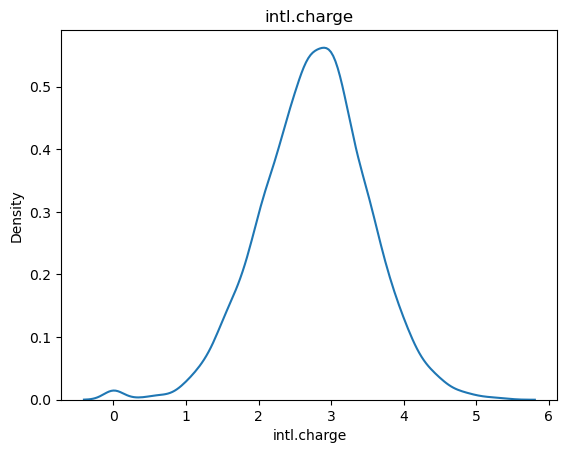

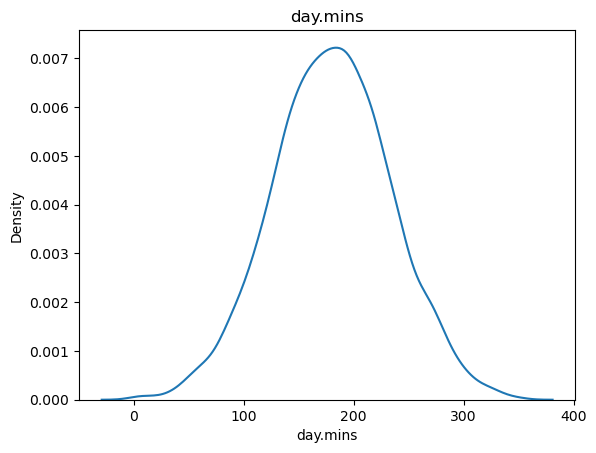

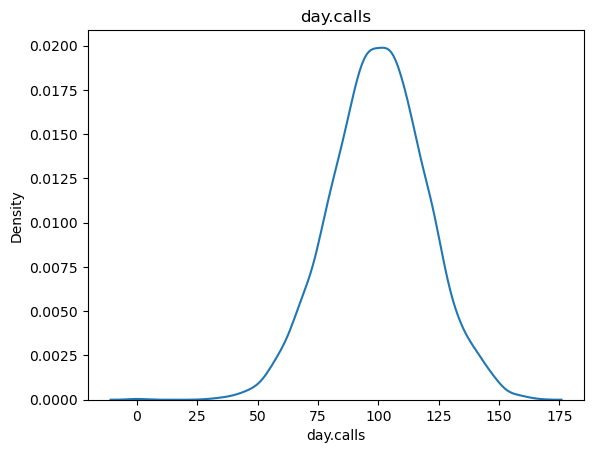

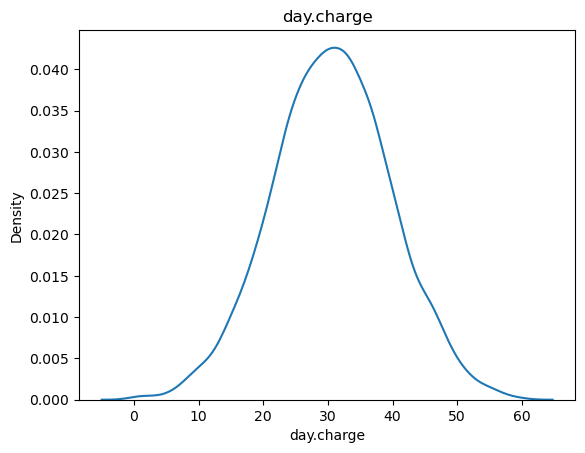

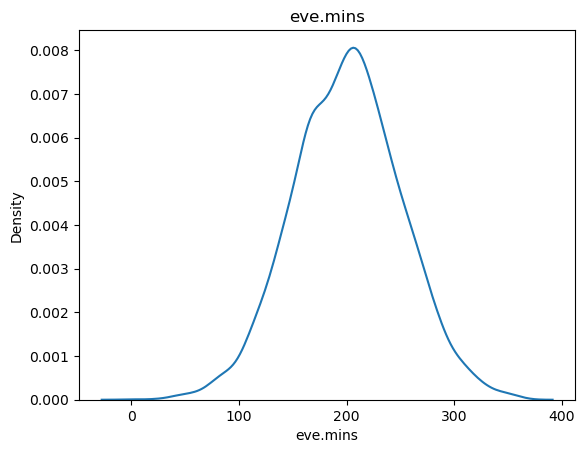

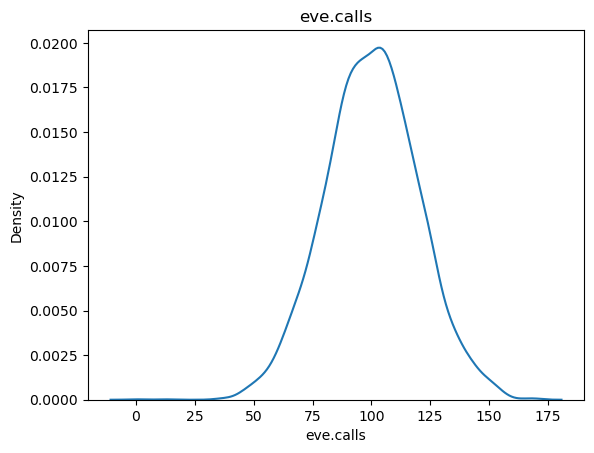

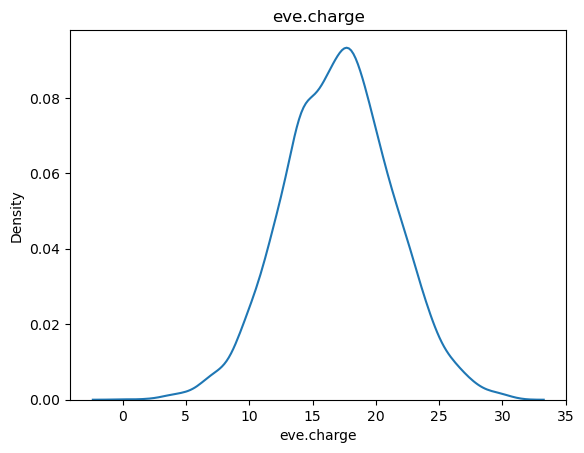

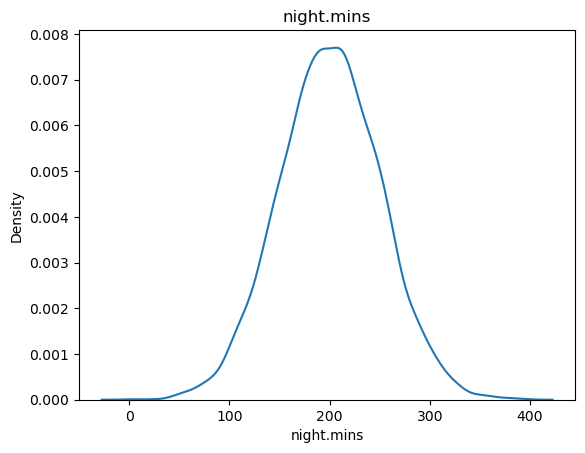

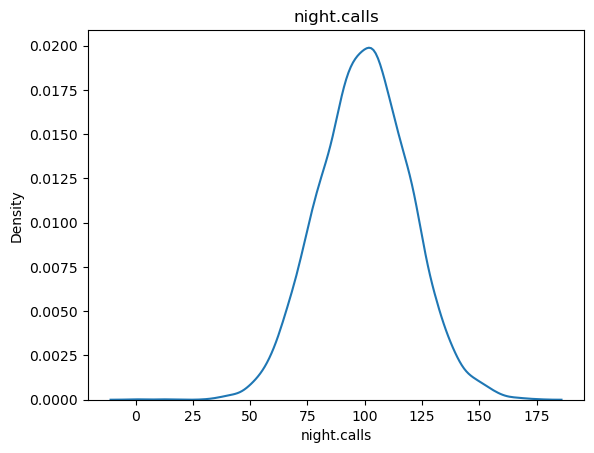

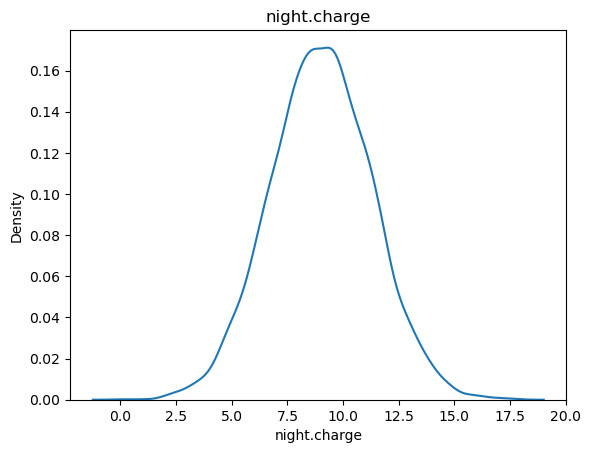

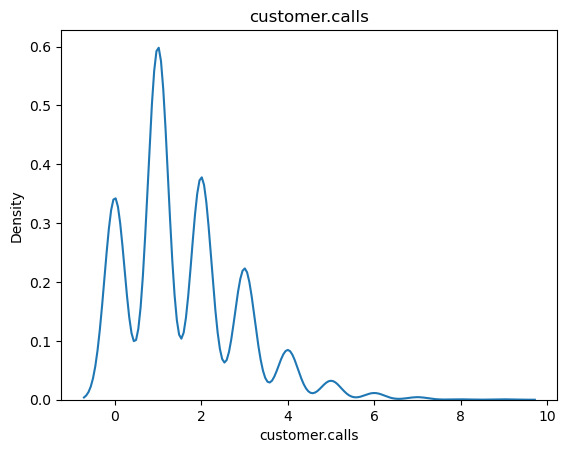

In [40]:
for i in num:
    sns.kdeplot(df[i],legend='churn')
    plt.title(i)
    plt.show()

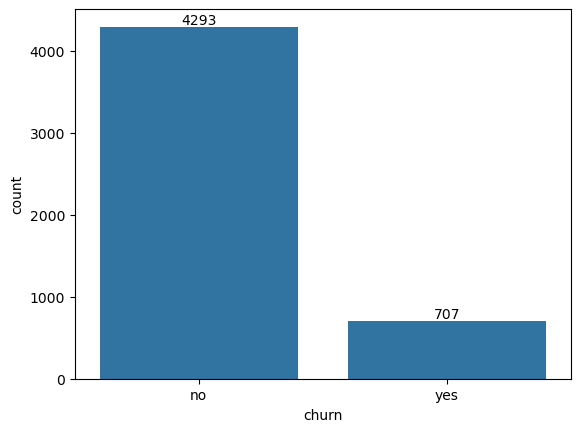

In [41]:
ax = sns.countplot(data=df, x='churn')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

In [42]:
df=pd.get_dummies(df,dtype=int)

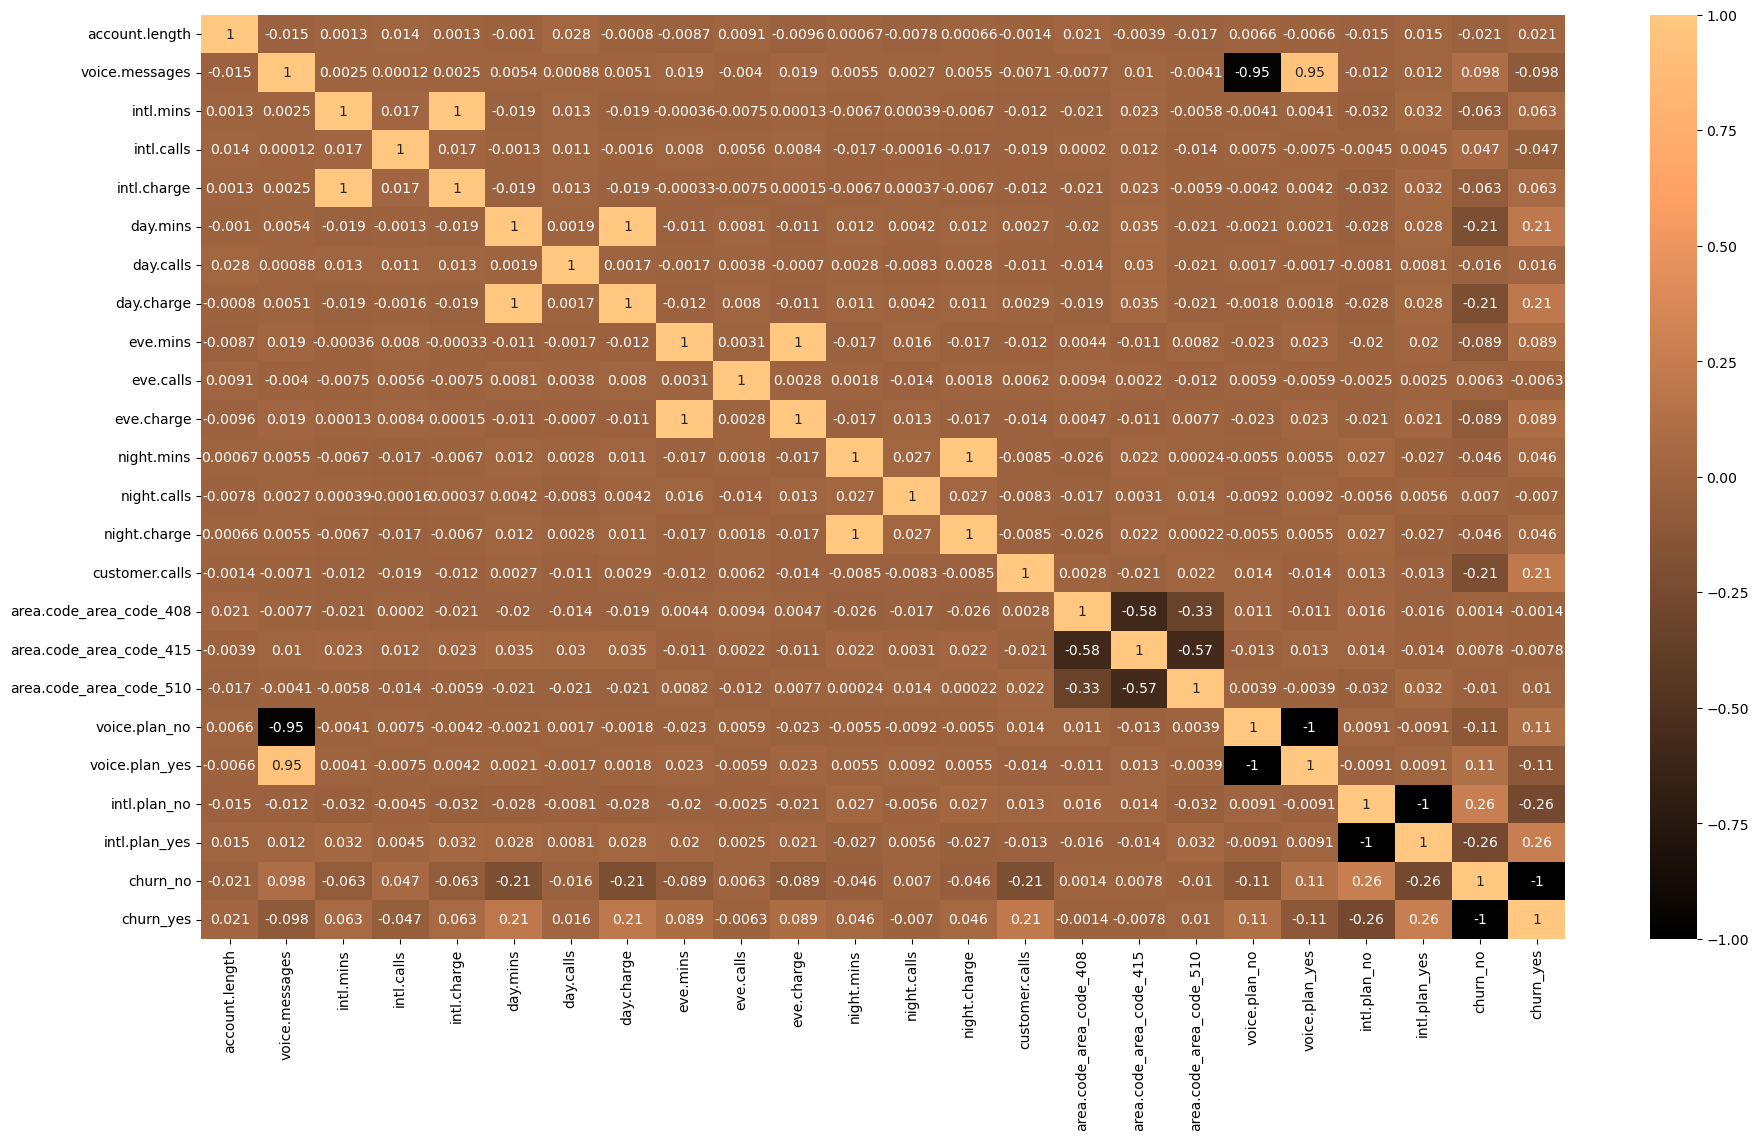

In [43]:
plt.figure(figsize=(22,12))
sns.heatmap(df.corr(),annot = True,vmin = -1,vmax = 1,cmap = 'copper')
plt.show()

In [44]:
df.describe()

account.length  voice.messages    intl.mins   intl.calls  intl.charge  \
count      5000.00000     5000.000000  5000.000000  5000.000000  5000.000000   
mean        100.25860        7.755200    10.261780     4.435200     2.771196   
std          39.69456       13.546393     2.761396     2.456788     0.745514   
min           1.00000        0.000000     0.000000     0.000000     0.000000   
25%          73.00000        0.000000     8.500000     3.000000     2.300000   
50%         100.00000        0.000000    10.300000     4.000000     2.780000   
75%         127.00000       17.000000    12.000000     6.000000     3.240000   
max         243.00000       52.000000    20.000000    20.000000     5.400000   

          day.mins    day.calls   day.charge     eve.mins    eve.calls  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean    180.288900   100.029400    30.653454   200.582340   100.191000   
std      53.894699    19.831197     9.159936    50.433144    19.826496   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     143.700000    87.000000    24.430000   166.600000    87.000000   
50%     180.100000   100.000000    30.620000   201.000000   100.000000   
75%     216.200000   113.000000    36.750000   233.900000   114.000000   
max     351.500000   165.000000    59.760000   363.700000   170.000000   

        eve.charge   night.mins  night.calls  night.charge  customer.calls  \
count  5000.000000  5000.000000  5000.000000   5000.000000     5000.000000   
mean     17.054322   200.391620    99.919200      9.017732        1.570400   
std       4.296843    50.527789    19.958686      2.273763        1.306363   
min       0.000000     0.000000     0.000000      0.000000        0.000000   
25%      14.140000   166.900000    87.000000      7.510000        1.000000   
50%      17.090000   200.400000   100.000000      9.020000        1.000000   
75%      19.900000   234.700000   113.000000     10.560000        2.000000   
max      30.910000   395.000000   175.000000     17.770000        9.000000   

       area.code_area_code_408  area.code_area_code_415  \
count               5000.00000              5000.000000   
mean                   0.25180                 0.499000   
std                    0.43409                 0.500049   
min                    0.00000                 0.000000   
25%                    0.00000                 0.000000   
50%                    0.00000                 0.000000   
75%                    1.00000                 1.000000   
max                    1.00000                 1.000000   

       area.code_area_code_510  voice.plan_no  voice.plan_yes  intl.plan_no  \
count              5000.000000    5000.000000     5000.000000   5000.000000   
mean                  0.249200       0.735400        0.264600      0.905400   
std                   0.432593       0.441164        0.441164      0.292691   
min                   0.000000       0.000000        0.000000      0.000000   
25%                   0.000000       0.000000        0.000000      1.000000   
50%                   0.000000       1.000000        0.000000      1.000000   
75%                   0.000000       1.000000        1.000000      1.000000   
max                   1.000000       1.000000        1.000000      1.000000   

       intl.plan_yes     churn_no    churn_yes  
count    5000.000000  5000.000000  5000.000000  
mean        0.094600     0.858600     0.141400  
std         0.292691     0.348469     0.348469  
min         0.000000     0.000000     0.000000  
25%         0.000000     1.000000     0.000000  
50%         0.000000     1.000000     0.000000  
75%         0.000000     1.000000     0.000000  
max         1.000000     1.000000     1.000000

In [45]:
# Changing the dtype of area.code by removing unwanted stting values
#df['area.code']=df['area.code'].str.replace(r"[a-zA-Z__]",'')

In [46]:
df.head(5)

account.length  voice.messages  intl.mins  intl.calls  intl.charge  \
0             128              25       10.0           3         2.70   
1             107              26       13.7           3         3.70   
2             137               0       12.2           5         3.29   
3              84               0        6.6           7         1.78   
4              75               0       10.1           3         2.73   

   day.mins  day.calls  day.charge  eve.mins  eve.calls  eve.charge  \
0     265.1        110       45.07     197.4         99       16.78   
1     161.6        123       27.47     195.5        103       16.62   
2     243.4        114       41.38     121.2        110       10.30   
3     299.4         71       50.90      61.9         88        5.26   
4     166.7        113       28.34     148.3        122       12.61   

   night.mins  night.calls  night.charge  customer.calls  \
0       244.7           91         11.01               1   
1       254.4          103         11.45               1   
2       162.6          104          7.32               0   
3       196.9           89          8.86               2   
4       186.9          121          8.41               3   

   area.code_area_code_408  area.code_area_code_415  area.code_area_code_510  \
0                        0                        1                        0   
1                        0                        1                        0   
2                        0                        1                        0   
3                        1                        0                        0   
4                        0                        1                        0   

   voice.plan_no  voice.plan_yes  intl.plan_no  intl.plan_yes  churn_no  \
0              0               1             1              0         1   
1              0               1             1              0         1   
2              1               0             1              0         1   
3              1               0             0              1         1   
4              1               0             0              1         1   

   churn_yes  
0          0  
1          0  
2          0  
3          0  
4          0

In [47]:
#Applying lable encding for voice plan, intl plan, chrurn col since categoarical 
# from sklearn import preprocessing
# scaler=preprocessing.LabelEncoder()
# for i in df.iloc[:,1:].columns:
#     if df[i].dtype==object:
#         df[i]=scaler.fit_transform(df[i])
#     else:
#         pass
dt=pd.get_dummies(dt,dtype=int)
from sklearn.ensemble import IsolationForest
clf=IsolationForest()
x=dt.iloc[:,:-1]
clf.fit(x)

IsolationForest()

In [48]:
outliers=clf.predict(x)

In [49]:
outliers

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [50]:
import statistics as st
st.Counter(outliers==-1)

Counter({False: 5000})

In [51]:
df.head()

account.length  voice.messages  intl.mins  intl.calls  intl.charge  \
0             128              25       10.0           3         2.70   
1             107              26       13.7           3         3.70   
2             137               0       12.2           5         3.29   
3              84               0        6.6           7         1.78   
4              75               0       10.1           3         2.73   

   day.mins  day.calls  day.charge  eve.mins  eve.calls  eve.charge  \
0     265.1        110       45.07     197.4         99       16.78   
1     161.6        123       27.47     195.5        103       16.62   
2     243.4        114       41.38     121.2        110       10.30   
3     299.4         71       50.90      61.9         88        5.26   
4     166.7        113       28.34     148.3        122       12.61   

   night.mins  night.calls  night.charge  customer.calls  \
0       244.7           91         11.01               1   
1       254.4          103         11.45               1   
2       162.6          104          7.32               0   
3       196.9           89          8.86               2   
4       186.9          121          8.41               3   

   area.code_area_code_408  area.code_area_code_415  area.code_area_code_510  \
0                        0                        1                        0   
1                        0                        1                        0   
2                        0                        1                        0   
3                        1                        0                        0   
4                        0                        1                        0   

   voice.plan_no  voice.plan_yes  intl.plan_no  intl.plan_yes  churn_no  \
0              0               1             1              0         1   
1              0               1             1              0         1   
2              1               0             1              0         1   
3              1               0             0              1         1   
4              1               0             0              1         1   

   churn_yes  
0          0  
1          0  
2          0  
3          0  
4          0

Tree based feature selection

In [52]:
# splitted data into training and testing using train_test_split library
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.2)

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [54]:
RFC = RandomForestClassifier()      
RFC = RFC.fit(x_train,y_train)
importances = RFC.feature_importances_
std = np.std([tree.feature_importances_ for tree in RFC.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

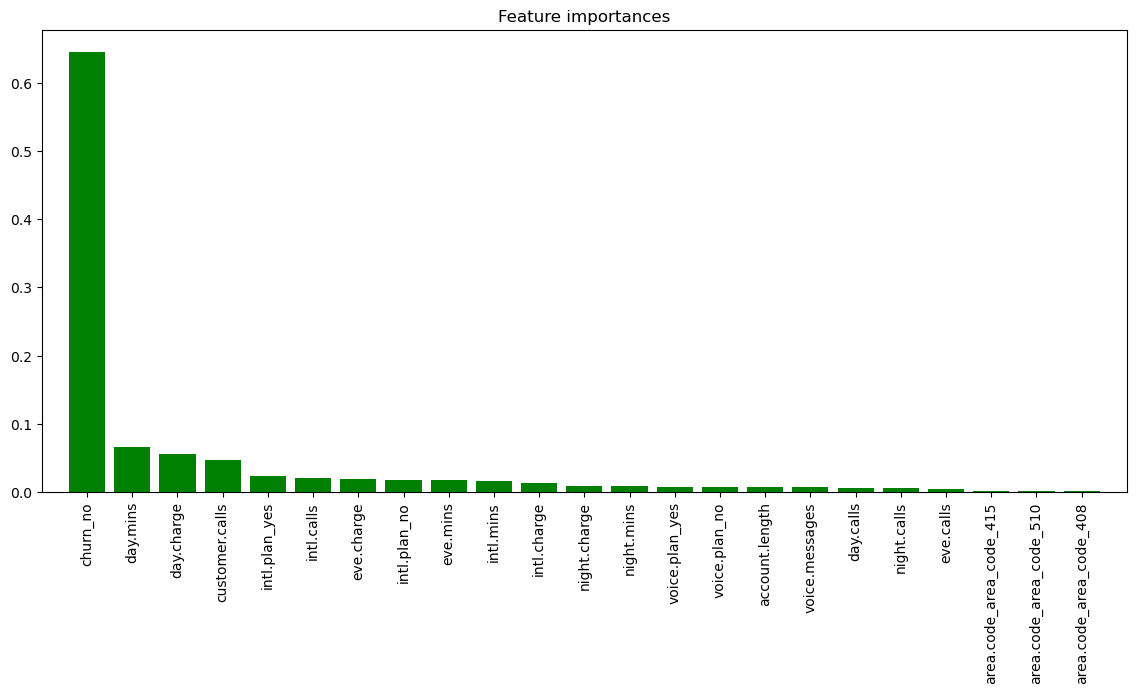

In [55]:
plt.figure(1, figsize=(14, 6))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

Use if SelectFromModel for feature selection

In [56]:
from sklearn.feature_selection import SelectFromModel

In [57]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 20))
sel.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=20))

In [58]:
sel.get_support()

array([False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True])

In [59]:
selected_feat= x_train.columns[(sel.get_support())]
len(selected_feat)

3

In [60]:
print(selected_feat)

Index(['day.mins', 'day.charge', 'churn_no'], dtype='object')


Model Deployment 

In [61]:
new_df=df[['day.mins', 'day.charge', 'customer.calls', 'churn_no']]

In [62]:
df_std=pd.get_dummies(df,dtype=int)

In [63]:
std_new_df=pd.get_dummies(new_df,dtype=int)

In [71]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data

dataframe = pd.read_csv('Churn.csv')
array = df_std.values
X = array[:,0:23]
Y = array[:,-1]
# feature extraction
model = LogisticRegression(max_iter=400)
rfe = RFE(estimator = model)
fit = rfe.fit(X, Y)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [72]:
fit.ranking_

array([10,  8,  1,  2,  4,  5,  6,  1, 11,  7,  1,  9, 12, 13,  1,  1,  1,
        1,  1,  3,  1,  1,  1])

In [73]:
df_std.shape

(5000, 24)

In [74]:
fit.ranking_.shape

(23,)

In [75]:
df.columns

Index(['account.length', 'voice.messages', 'intl.mins', 'intl.calls',
       'intl.charge', 'day.mins', 'day.calls', 'day.charge', 'eve.mins',
       'eve.calls', 'eve.charge', 'night.mins', 'night.calls', 'night.charge',
       'customer.calls', 'area.code_area_code_408', 'area.code_area_code_415',
       'area.code_area_code_510', 'voice.plan_no', 'voice.plan_yes',
       'intl.plan_no', 'intl.plan_yes', 'churn_no', 'churn_yes'],
      dtype='object')

In [77]:
sel_feature=pd.DataFrame({'Col Names': df_std.iloc[:,0:23].columns, 'Rank': fit.ranking_})
sel_feature

Col Names  Rank
0            account.length    10
1            voice.messages     8
2                 intl.mins     1
3                intl.calls     2
4               intl.charge     4
5                  day.mins     5
6                 day.calls     6
7                day.charge     1
8                  eve.mins    11
9                 eve.calls     7
10               eve.charge     1
11               night.mins     9
12              night.calls    12
13             night.charge    13
14           customer.calls     1
15  area.code_area_code_408     1
16  area.code_area_code_415     1
17  area.code_area_code_510     1
18            voice.plan_no     1
19           voice.plan_yes     3
20             intl.plan_no     1
21            intl.plan_yes     1
22                 churn_no     1

In [78]:
feature_name=[]
for i in range(0,20):
    if sel_feature['Rank'][i]==1:
        feature_name.append(sel_feature['Col Names'][i])
feature_name

['intl.mins',
 'day.charge',
 'eve.charge',
 'customer.calls',
 'area.code_area_code_408',
 'area.code_area_code_415',
 'area.code_area_code_510',
 'voice.plan_no']

In [79]:
data=df[feature_name]
data.shape

(5000, 8)

In [80]:
df.head()

account.length  voice.messages  intl.mins  intl.calls  intl.charge  \
0             128              25       10.0           3         2.70   
1             107              26       13.7           3         3.70   
2             137               0       12.2           5         3.29   
3              84               0        6.6           7         1.78   
4              75               0       10.1           3         2.73   

   day.mins  day.calls  day.charge  eve.mins  eve.calls  eve.charge  \
0     265.1        110       45.07     197.4         99       16.78   
1     161.6        123       27.47     195.5        103       16.62   
2     243.4        114       41.38     121.2        110       10.30   
3     299.4         71       50.90      61.9         88        5.26   
4     166.7        113       28.34     148.3        122       12.61   

   night.mins  night.calls  night.charge  customer.calls  \
0       244.7           91         11.01               1   
1       254.4          103         11.45               1   
2       162.6          104          7.32               0   
3       196.9           89          8.86               2   
4       186.9          121          8.41               3   

   area.code_area_code_408  area.code_area_code_415  area.code_area_code_510  \
0                        0                        1                        0   
1                        0                        1                        0   
2                        0                        1                        0   
3                        1                        0                        0   
4                        0                        1                        0   

   voice.plan_no  voice.plan_yes  intl.plan_no  intl.plan_yes  churn_no  \
0              0               1             1              0         1   
1              0               1             1              0         1   
2              1               0             1              0         1   
3              1               0             0              1         1   
4              1               0             0              1         1   

   churn_yes  
0          0  
1          0  
2          0  
3          0  
4          0

In [81]:
data=data.astype(dtype=float)


In [82]:
data.value_counts

<bound method DataFrame.value_counts of       intl.mins  day.charge  eve.charge  customer.calls  \
0          10.0       45.07       16.78             1.0   
1          13.7       27.47       16.62             1.0   
2          12.2       41.38       10.30             0.0   
3           6.6       50.90        5.26             2.0   
4          10.1       28.34       12.61             3.0   
5           6.3       37.98       18.75             0.0   
6           7.5       37.09       29.62             3.0   
7           7.1       26.69        8.76             0.0   
8           8.7       31.37       29.89             1.0   
9          11.2       43.96       18.87             0.0   
10         12.7       21.95       19.42             4.0   
11          9.1       31.91       13.89             0.0   
12         11.2       30.62        8.92             1.0   
13         12.3       26.62       21.05             3.0   
14         13.1       20.52       26.11             4.0   
15          5.4 

In [83]:
x=data
y=df.iloc[:,-1]

In [86]:
x

intl.mins  day.charge  eve.charge  customer.calls  \
0          10.0       45.07       16.78             1.0   
1          13.7       27.47       16.62             1.0   
2          12.2       41.38       10.30             0.0   
3           6.6       50.90        5.26             2.0   
4          10.1       28.34       12.61             3.0   
5           6.3       37.98       18.75             0.0   
6           7.5       37.09       29.62             3.0   
7           7.1       26.69        8.76             0.0   
8           8.7       31.37       29.89             1.0   
9          11.2       43.96       18.87             0.0   
10         12.7       21.95       19.42             4.0   
11          9.1       31.91       13.89             0.0   
12         11.2       30.62        8.92             1.0   
13         12.3       26.62       21.05             3.0   
14         13.1       20.52       26.11             4.0   
15          5.4       56.59       27.01             4.0   
16         13.8       33.39       23.88             1.0   
17          8.1       32.42       18.55             3.0   
18         10.0       32.25       18.09             1.0   
19         13.0       38.15       13.56             1.0   
20         10.6       26.37       20.37             0.0   
21          5.7       10.61       14.44             5.0   
22          9.5       31.11        6.20             0.0   
23          7.7       18.77       11.67             2.0   
24         10.3       13.79       20.84             0.0   
25         15.5       21.13       23.55             3.0   
26          9.5       36.21       16.24             0.0   
27         14.7       30.62       13.22             3.0   
28          6.3       32.30       21.95             0.0   
29         11.1       20.28       18.28             1.0   
30         14.2       14.42       11.62             2.0   
31         10.3       38.44       17.13             1.0   
32         12.6       36.04        2.65             3.0   
33         11.8       42.43       21.45             1.0   
34          8.3       30.06       16.58             0.0   
35         14.7       37.40       18.47             3.0   
36         14.5       24.87       13.81             0.0   
37         10.0       22.24       19.01             1.0   
38         10.5       34.66       15.95             3.0   
39         11.1       23.87       23.10             1.0   
40          9.4       21.47       14.18             3.0   
41         14.6       29.43       17.33             0.0   
42         10.0       21.22       23.99             2.0   
43          9.2       14.59       14.05             3.0   
44          3.5       26.18       19.19             1.0   
45          8.5       20.55       18.11             2.0   
46         13.2       35.92       13.82             3.0   
47          7.4       30.62       11.44             2.0   
48          8.8       27.05       19.66             5.0   
49         11.0       22.64       18.46             1.0   
50          7.8       32.62       22.93             3.0   
51          6.8       37.50       17.94             1.0   
52         11.4       31.64       16.17             2.0   
53          9.3       27.23       22.74             2.0   
54          9.7       25.67       18.67             5.0   
55         10.2       29.84       21.19             1.0   
56          8.0       21.57       15.30             1.0   
57          5.8       33.73        6.40             3.0   
58         12.1       25.30       20.95             3.0   
59         12.0       38.98       15.08             1.0   
60         11.4       32.66       14.44             1.0   
61         11.6       45.66       15.15             2.0   
62         14.6       32.93       20.92             2.0   
63         12.6       30.72       15.96             3.0   
64          8.2       22.30       13.85             2.0   
65          6.2       25.18       14.41             2.0   
66          9.3       42.76       18.09             0

In [87]:
x.isnull().sum()

intl.mins                  0
day.charge                 0
eve.charge                 0
customer.calls             0
area.code_area_code_408    0
area.code_area_code_415    0
area.code_area_code_510    0
voice.plan_no              0
dtype: int64

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [90]:
models=[
       RandomForestClassifier(n_estimators=200,max_samples=0.8,max_features=5),
    

       ]

In [91]:
for model in models:
    model.fit (x_train,y_train)
    pred=model.predict(x_test)
    print(model)
    print("===="*20)
    print(classification_report(y_test,pred))

RandomForestClassifier(max_features=5, max_samples=0.8, n_estimators=200)
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       874
           1       0.88      0.60      0.71       126

    accuracy                           0.94      1000
   macro avg       0.91      0.79      0.84      1000
weighted avg       0.94      0.94      0.93      1000



In [92]:
Lg=LogisticRegression(random_state=10)
Lg.fit (x_train,y_train)
pred=Lg.predict(x_test)
print(Lg)
print("===="*20)
print(classification_report(y_test,pred))

LogisticRegression(random_state=10)
              precision    recall  f1-score   support

           0       0.89      0.99      0.93       874
           1       0.58      0.12      0.20       126

    accuracy                           0.88      1000
   macro avg       0.73      0.55      0.57      1000
weighted avg       0.85      0.88      0.84      1000



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [93]:
from sklearn.metrics import accuracy_score

test_acc=accuracy_score(y_test,pred)
test_acc

0.878

In [94]:
from sklearn.tree import DecisionTreeClassifier

model_dt=DecisionTreeClassifier(random_state=20,criterion='gini')
model_dt.fit(x_train,y_train)
model_dt.score(x_test,y_test)

0.89

In [95]:
path=model_dt.cost_complexity_pruning_path(x_train,y_train)
ccp_aplhas,impurities=path.ccp_alphas,path.impurities

In [96]:
pruned_models=[]
for i in ccp_aplhas:
    pruned_model=DecisionTreeClassifier(criterion='gini',ccp_alpha=i)
    pruned_model.fit(x_train,y_train)
    pruned_models.append(pruned_model)
    

In [97]:
best_acc=0
accuracy=[]
model=[]
best_pruned_model=None
for i in pruned_models:
    acc=i.score(x_train,y_train)
    accuracy.append(acc)
    model.append(i)
    if acc>best_acc:
        best_acc=acc
        best_pruned_model=i
print(best_acc,best_pruned_model)

accuracy_After_pruning=best_pruned_model.score(x_test,y_test)
accuracy_After_pruning

1.0 DecisionTreeClassifier()


0.885

In [98]:
accuracy

[1.0,
 0.99975,
 0.9995,
 0.99925,
 0.999,
 0.99875,
 0.998,
 0.9975,
 0.9975,
 0.99775,
 0.99775,
 0.997,
 0.99625,
 0.997,
 0.99625,
 0.9955,
 0.99575,
 0.99375,
 0.994,
 0.99275,
 0.993,
 0.99325,
 0.9925,
 0.99175,
 0.99125,
 0.99025,
 0.99075,
 0.98975,
 0.9895,
 0.99025,
 0.99,
 0.9895,
 0.98875,
 0.989,
 0.989,
 0.98825,
 0.988,
 0.9875,
 0.98775,
 0.9865,
 0.98625,
 0.98625,
 0.9855,
 0.98425,
 0.983,
 0.983,
 0.98325,
 0.98125,
 0.98125,
 0.97925,
 0.9805,
 0.98,
 0.97975,
 0.979,
 0.9785,
 0.9785,
 0.97875,
 0.97825,
 0.97825,
 0.978,
 0.9775,
 0.97675,
 0.9775,
 0.97625,
 0.9765,
 0.9745,
 0.97475,
 0.975,
 0.974,
 0.9725,
 0.97225,
 0.97125,
 0.97175,
 0.9705,
 0.97,
 0.9705,
 0.97,
 0.9655,
 0.9655,
 0.96725,
 0.9635,
 0.964,
 0.96375,
 0.96275,
 0.963,
 0.9615,
 0.96075,
 0.96075,
 0.96,
 0.96075,
 0.95975,
 0.95875,
 0.959,
 0.9575,
 0.9585,
 0.957,
 0.9535,
 0.9515,
 0.9505,
 0.9515,
 0.9505,
 0.9515,
 0.9515,
 0.9485,
 0.94825,
 0.94775,
 0.94675,
 0.94675,
 0.946,
 0.

In [99]:
model

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.0001231060606060604),
 DecisionTreeClassifier(ccp_alpha=0.00012424698795180706),
 DecisionTreeClassifier(ccp_alpha=0.00012454379562043723),
 DecisionTreeClassifier(ccp_alpha=0.0001555555555555556),
 DecisionTreeClassifier(ccp_alpha=0.00015625),
 DecisionTreeClassifier(ccp_alpha=0.0001566666666666667),
 DecisionTreeClassifier(ccp_alpha=0.00015873015873015878),
 DecisionTreeClassifier(ccp_alpha=0.00016049382716049377),
 DecisionTreeClassifier(ccp_alpha=0.0001619047619047619),
 DecisionTreeClassifier(ccp_alpha=0.0001624228395061729),
 DecisionTreeClassifier(ccp_alpha=0.00016287878787878783),
 DecisionTreeClassifier(ccp_alpha=0.00016414141414141387),
 DecisionTreeClassifier(ccp_alpha=0.00016498316498316464),
 DecisionTreeClassifier(ccp_alpha=0.0001652941176470587),
 DecisionTreeClassifier(ccp_alpha=0.0001655092592592591),
 DecisionTreeClassifier(ccp_alpha=0.00016666666666666666),
 DecisionTreeClassifier(ccp_alpha=0.000182949938

In [100]:
from pickle import dump
from pickle import load
import pandas as pd
dump(model, open('Chrun_RF.sav', 'wb'))

In [107]:
loaded_model = load(open('Chrun_RF.sav', 'rb'))
loaded_model = loaded_model[0]
result = loaded_model.score(x,y)
print(result)

0.977


In [ ]:
!streamlit run churndeploy.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://192.168.1.8:8501

/Users/vidyashinde/Documents/Customer Churning/churndeploy.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['churn']=data.churn.replace({'yes':1,'no':0})
/Users/vidyashinde/Documents/Customer Churning/churndeploy.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['voice.plan']=data['voice.plan'].replace({'yes':1,'no':0})
/Users/vidyashinde/Documents/Customer Churning/churndeploy.py:16: